# Preliminary Plots

# Deprecated and not updated, DO NOT USE (or use with  care)

## Summer 2019 Caltech Research

Started on 19 June 2019. This notebook will serve as a compilation of useful functions and tools that will serve me thoughout this project.

### Imports

In [1]:
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt

### Constants (astronomy is in cgs, right?)

In [2]:
G = 6.67259e-8
SIG_SB = 5.67051e-5
M_SUN = 1.99e33
R_SUN = 6.96e10
h_PLANCK = 6.6260755e-27
c_LIGHT = 2.99792458e10
k_BOLTZ = 1.380658e-16

## Temperature profile of a Keplerian disk

In the limit of steady accretion and being an optically thick disk, Hartmann and Kenyon (1996) provide
$$T^4 = \dfrac{3GM_* \dot{M}}{8\pi\sigma r^3}\Big[1 - \Big(\dfrac{r_i}{r}\Big)^{1/2}\Big] $$

where $R_i$ is the inner disk radius.

In [54]:
def tempKepDisk(r, r_inner, m_dot, m_star):
    term1 = 3*G*m_star*m_dot / (8 * np.pi * SIG_SB * (r**3))
    term2 = (1 - (r_inner/r)**(1/2))
    return (term1 * term2)**(1/4)

In [55]:
r_inner_test = 2*R_SUN
m_dot_test = 1e-4 * M_SUN / 3.154e7
m_star_test = 0.8 * M_SUN

r_start = 5*R_SUN
r_end = 20*R_SUN

ticks = np.linspace(r_start, r_end, 5)

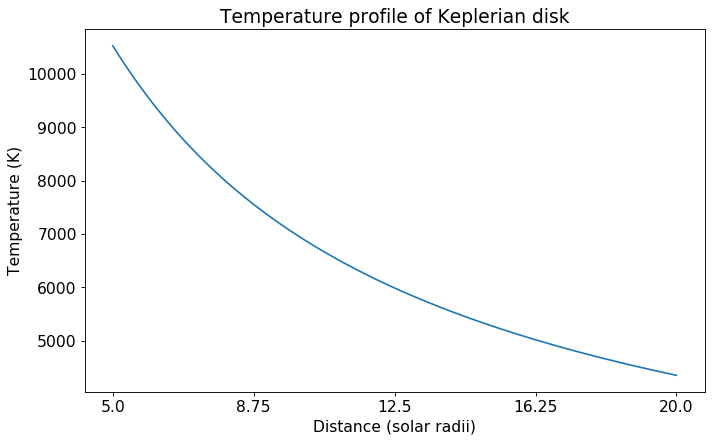

In [56]:
r = np.linspace(r_start, r_end, 100)

fig=plt.figure(figsize=(10, 6), dpi= 80)
plt.rcParams.update({'font.size': 14})
plt.plot(r, tempKepDisk(r, r_inner_test, m_dot_test, m_star_test))
plt.xlabel('Distance (solar radii)')
plt.xticks(ticks, np.array(ticks/R_SUN, dtype=str))
plt.ylabel('Temperature (K)')
plt.title('Temperature profile of Keplerian disk')
plt.show()

## Luminosity per wavelength of accretion disk

Planck's law gives the spectral radiance, so just multiply by the emitting surface area to get the luminosity per wavelength:
$$L_\lambda = 2\pi(r^2 - r_i^2)\dfrac{2hc^2}{\lambda^5}\dfrac{1}{\exp(\frac{hc}{\lambda k_B T}) - 1}$$

where this will be in erg/s/cm.

In [6]:
def lumDisk(wavelength, temp, r, r_inner):
    term1 = 2*np.pi *r*r_inner
    term2 = 2*h_PLANCK*(c_LIGHT**2)*(wavelength**(-5))
    term3 = (np.exp(h_PLANCK*c_LIGHT/(wavelength*k_BOLTZ*temp))-1)**(-1)
    return term1*term2*term3

In [7]:
r_inner_test = r_inner_test
r_test = 8*R_SUN

temp_test_1 = 5000
temp_test_2 = 10000
temp_test_3 = 20000

wave_start = 5e-5
wave_end = 10e-5

ticks = np.linspace(wave_start, wave_end, 10)

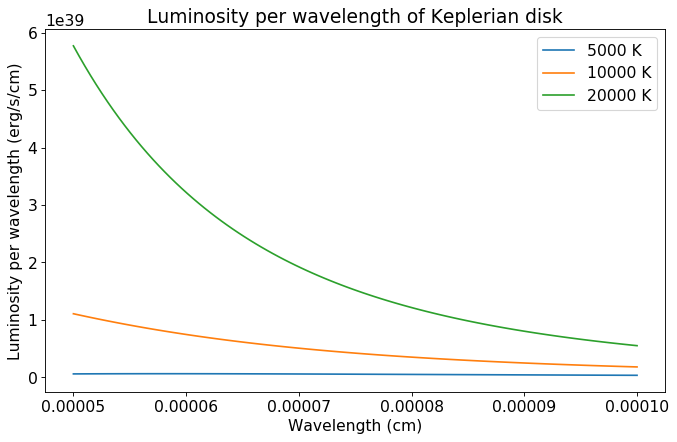

In [8]:
w = np.linspace(wave_start, wave_end, 100)

fig=plt.figure(figsize=(10, 6), dpi= 80)
plt.rcParams.update({'font.size': 14})
plt.plot(w, lumDisk(w, temp_test_1, r_test, r_inner_test), label=str(temp_test_1) + ' K')
plt.plot(w, lumDisk(w, temp_test_2, r_test, r_inner_test), label=str(temp_test_2) + ' K')
plt.plot(w, lumDisk(w, temp_test_3, r_test, r_inner_test), label=str(temp_test_3) + ' K')

plt.xlabel('Wavelength (cm)')
# plt.xticks(ticks, np.array(ticks, dtype=str))
plt.ylabel('Luminosity per wavelength (erg/s/cm)')
plt.title('Luminosity per wavelength of Keplerian disk')
plt.legend()
plt.show()

## Luminosity per frequency of accretion disk

Planck's law gives the spectral radiance, so just multiply by the emitting surface area to get the luminosity per frequency:
$$L_\nu = 2\pi(r^2 - r_i^2)\dfrac{2h \nu^3}{c^2}\dfrac{1}{\exp(\frac{h\nu}{k_B T}) - 1}$$

In [9]:
def lumDiskFreq(freq, temp, r, r_inner):
    term1 = 2*np.pi *(r**2 - r_inner**2)
    term2 = 2*h_PLANCK*(c_LIGHT**(-2))*(freq**3)
    term3 = (np.exp(h_PLANCK*freq/(k_BOLTZ*temp))-1)**(-1)
    return term1*term2*term3

In [10]:
r_inner_test = r_inner_test
r_test = 8*R_SUN

temp_test_1 = 5000
temp_test_2 = 10000
temp_test_3 = 20000

f_start = c_LIGHT/ 5e-5
f_end = c_LIGHT/ 10e-4

ticks = np.linspace(f_start, f_end, 10)

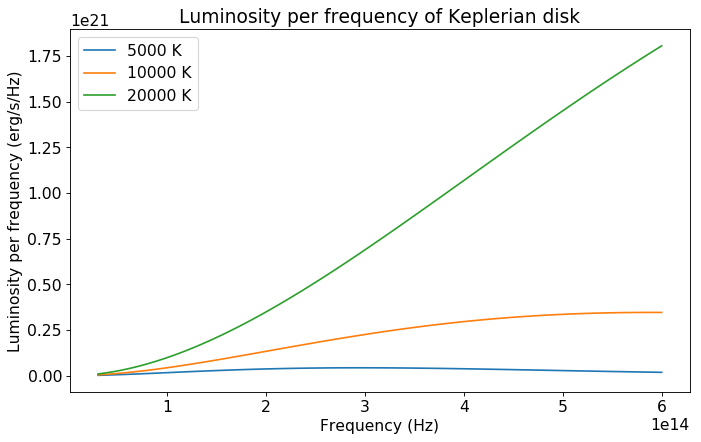

In [11]:
f = np.linspace(f_start, f_end, 100)

fig=plt.figure(figsize=(10, 6), dpi= 80)
plt.rcParams.update({'font.size': 14})
plt.plot(f, lumDiskFreq(f, temp_test_1, r_test, r_inner_test), label=str(temp_test_1) + ' K')
plt.plot(f, lumDiskFreq(f, temp_test_2, r_test, r_inner_test), label=str(temp_test_2) + ' K')
plt.plot(f, lumDiskFreq(f, temp_test_3, r_test, r_inner_test), label=str(temp_test_3) + ' K')

plt.xlabel('Frequency (Hz)')
# plt.xticks(ticks, np.array(ticks, dtype=str))
plt.ylabel('Luminosity per frequency (erg/s/Hz)')
plt.title('Luminosity per frequency of Keplerian disk')
plt.legend()
plt.show()

## Luminosity of accretion disk by summing annuli

Now, I obtain my temperature at an annulus at radius $r$ using:
$$T^4 = \dfrac{3GM_* \dot{M}}{8\pi\sigma r^3}\Big[1 - \Big(\dfrac{r_i}{r}\Big)^{1/2}\Big] $$
and then calculate the luminosity of that annulus using:
$$L_\nu = A_\text{annulus}\dfrac{2h \nu^3}{c^2}\dfrac{1}{\exp(\frac{h\nu}{k_B T}) - 1}$$
However, I need to make sure that I use 
$$A_\text{annulus} = 2\pi(r_b^2 - r_a^2)$$
where I will supply tuples of $(r_a, r_b)$, with the difference between the two increasing at farther distances from the center, and I will use the temperature at $r_\text{avg} \equiv (r_b - r_a)/2$.

In [12]:
# Setting some test values
r_inner_test_new = 4 * R_SUN
r_low_test = 5*R_SUN
r_high_test = 20*R_SUN
r_sep_test = 0.5*R_SUN

m_dot_test = 1e-4 * M_SUN / 3.154e7
m_star_test = 0.8 * M_SUN


# Evenly spaced distances for now
r_list_test = np.arange(r_low_test, r_high_test, r_sep_test)

In [13]:
r_tup_test = []
for i in range(len(r_list_test)-1):
    r_tup_test.append((r_list_test[i], r_list_test[i+1]))

These are my tuples of radii

In [14]:
r_tup_test = np.array(r_tup_test)

r_b_test = np.array([i[1] for i in r_tup_test])
r_a_test = np.array([i[0] for i in r_tup_test])

Now, to find the $r_\text{avg}$ and corresponding temperatures:

In [15]:
r_avg_test = np.mean(r_tup_test, axis=1)
temps_test = tempKepDisk(r_avg_test, r_inner_test_new, m_dot_test, m_star_test)

Now, to plot those temperatures for a sanity check:

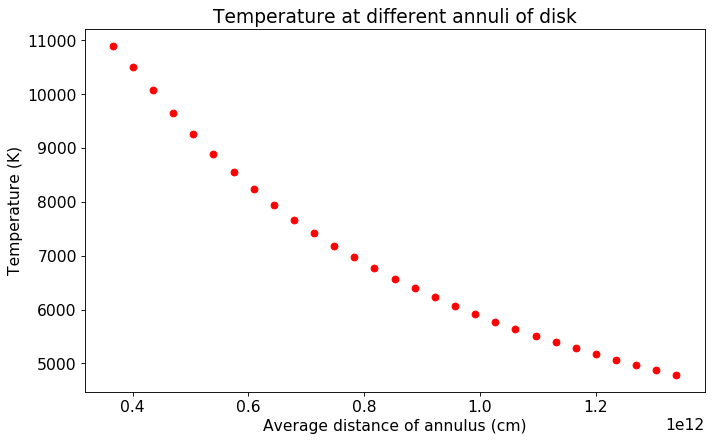

In [16]:
fig=plt.figure(figsize=(10, 6), dpi= 80)
plt.rcParams.update({'font.size': 14})
plt.plot(r_avg_test, temps_test, 'ro')
plt.xlabel('Average distance of annulus (cm)')
# plt.xticks(ticks, np.array(ticks, dtype=str))
plt.ylabel('Temperature (K)')
plt.title('Temperature at different annuli of disk')
plt.show()

Defining the luminosity per frequency of an annulus according to the formulae above 

In [17]:
def lumFreqAnnulus(freq, temp, r_b, r_a):
    term1 = 2*np.pi *(r_b**2 - r_a**2)
    term2 = 2*h_PLANCK*(c_LIGHT**(-2))*(freq**3)
    term3 = (np.exp(h_PLANCK*freq/(k_BOLTZ*temp))-1)**(-1)
    return term1*term2*term3

In [18]:
# Remember that we're in cgs units!!
f_start = c_LIGHT/ (7000e-8)
f_end = c_LIGHT/ (4000e-8)


Plotting

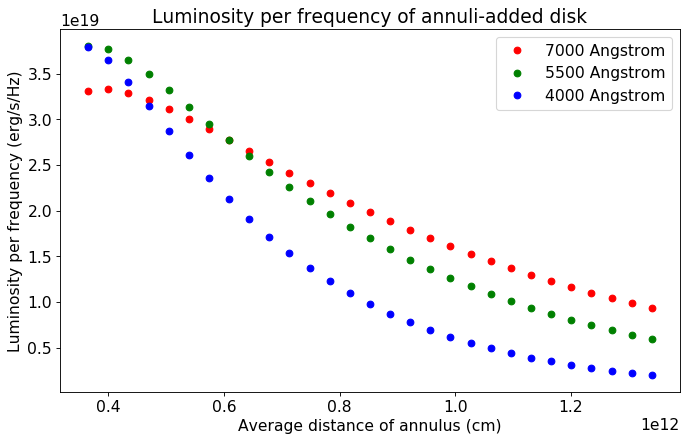

In [50]:
fig=plt.figure(figsize=(10, 6), dpi= 80)
plt.rcParams.update({'font.size': 14})
plt.plot(r_avg_test, lumFreqAnnulus(f_start, temps_test, r_b_test, r_a_test), 'ro', label='7000 Angstrom')
plt.plot(r_avg_test, lumFreqAnnulus(c_LIGHT/ (5500e-8), temps_test, r_b_test, r_a_test), 'go',\
                                                                             label='5500 Angstrom')
plt.plot(r_avg_test, lumFreqAnnulus(f_end, temps_test, r_b_test, r_a_test), 'bo', label='4000 Angstrom')

plt.xlabel('Average distance of annulus (cm)')
# plt.xticks(ticks, np.array(ticks, dtype=str))
plt.ylabel('Luminosity per frequency (erg/s/Hz)')
plt.title('Luminosity per frequency of annuli-added disk')
plt.legend()
plt.show()

## Incorporating Values from Table 3 in KHH1988

Let's see how the values from that table compare...

In [20]:
khh_rad = np.array([1.5, 1.73, 1.95, 2.14, 2.26, 2.37,\
                   2.55, 2.77, 2.98, 3.20, 3.85, 4.60,\
                   4.86, 5.19, 5.70, 6.28, 6.96, 7.77,\
                   8.73, 9.91, 11.37, 13.22, 15.64,\
                   18.89, 23.46, 28.16, 32.35, 37.74,\
                   44.86, 54.64, 68.77, 90.64, 128.19,\
                   204.84, 429.26])
khh_temp = np.array([6590, 6370, 6150, 5800, 5650,\
                    5500, 5370, 5100, 4900, 4700,\
                    4500, 3750, 3600, 3500, 3300,\
                    3100, 2900, 2700, 2500, 2300,\
                    2100, 1900, 1700, 1500, 1300,\
                    1100, 1000, 900, 800, 700, 600,\
                    500, 400, 300, 200])

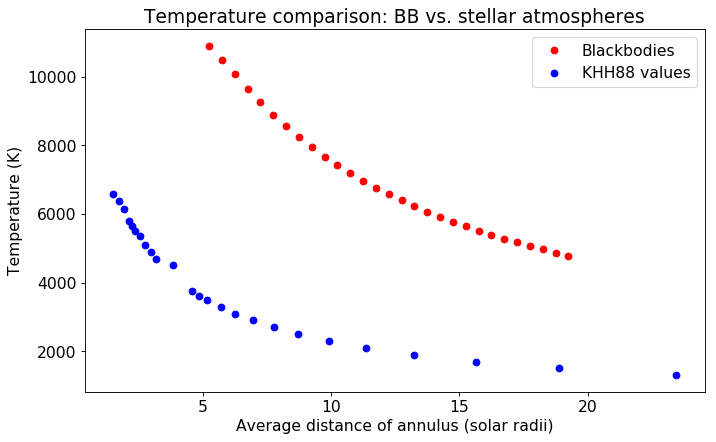

In [21]:
fig=plt.figure(figsize=(10, 6), dpi= 80)
plt.rcParams.update({'font.size': 14})
plt.plot(r_avg_test/R_SUN, temps_test, 'ro', label='Blackbodies')
plt.plot(khh_rad[:25], khh_temp[:25], 'bo', label='KHH88 values')
plt.xlabel('Average distance of annulus (solar radii)')
# plt.xticks(ticks, np.array(ticks, dtype=str))
plt.ylabel('Temperature (K)')
plt.title('Temperature comparison: BB vs. stellar atmospheres')
plt.legend()
plt.show()

This is going to be rough... scroll down quite a bit for the rest.

In [22]:
col1 = np.array([0.63,
0.12,
0.13,
0.04,
0.02,
0.02,
0.03,
0.01,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.])

In [23]:
col2 = np.array([0.40,
0.12,
0.19,
0.07,
0.04,
0.02,
0.04,
0.03,
0.01,
0.01,
0.03,
0.01,
0.01,
0.01,
0.01,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.])

In [24]:
col3 = np.array([0.31,
0.15,
0.14,
0.09,
0.04,
0.03,
0.04,
0.04,
0.02,
0.02,
0.06,
0.03,
0.01,
0.01,
0.01,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0])

In [25]:
col4 = np.array([0.21,
0.14,
0.12,
0.09,
0.04,
0.04,
0.05,
0.05,
0.03,
0.03,
0.07,
0.05,
0.01,
0.02,
0.02,
0.01,
0.01,
0.01,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.])

In [26]:
col5 = np.array([0.16,
0.12,
0.10,
0.09,
0.04,
0.04,
0.05,
0.05,
0.04,
0.03,
0.08,
0.07,
0.02,
0.02,
0.02,
0.02,
0.02,
0.01,
0.01,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.])

In [27]:
col6 = np.array([0.13,
0.11,
0.09,
0.08,
0.04,
0.04,
0.04,
0.04,
0.03,
0.03,
0.08,
0.08,
0.02,
0.03,
0.03,
0.03,
0.03,
0.02,
0.02,
0.01,
0.01,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.])

In [28]:
col7 = np.array([0.12,
0.08 ,
0.07 ,
0.06 ,
0.03 ,
0.03,
0.04 ,
0.04 ,
0.03 ,
0.03 ,
0.08 ,
0.10 ,
0.03 ,
0.04 ,
0.04 ,
0.04 ,
0.03 ,
0.03 ,
0.02 ,
0.02 ,
0.01 ,
0.01 ,
0.01 ,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.])

In [29]:
col8 = np.array([0.08,
0.05,
0.05,
0.04,
0.02,
0.02,
0.03,
0.03,
0.02,
0.03,
0.07,
0.11,
0.03,
0.04,
0.05,
0.05,
0.05,
0.04,
0.04,
0.04,
0.03,
0.03,
0.02,
0.01,
0.01,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.])

In [30]:
col9 = np.array([0.03,
0.02,
0.02,
0.02,
0.01,
0.01,
0.01,
0.02,
0.01,
0.01,
0.04,
0.08,
0.03,
0.04,
0.04,
0.04,
0.04,
0.05,
0.05,
0.06,
0.06,
0.06,
0.06,
0.06,
0.05,
0.03,
0.01,
0.01,
0.01,
0.,
0.,
0.,
0.,
0.,
0.])

In [31]:
col10 = np.array([0.02,
0.01,
0.01,
0.01,
0.01,
0.01,
0.01,
0.01,
0.01,
0.01,
0.02,
0.05,
0.02,
0.02,
0.02,
0.03,
0.03,
0.03,
0.04,
0.05,
0.05,
0.06,
0.07,
0.08,
0.08,
0.06,
0.04,
0.04,
0.03,
0.03,
0.02,
0.01,
0.,
0.,
0.])

In [32]:
col11 = np.array([0.08,
0.05,
0.05,
0.04,
0.02,
0.02,
0.03,
0.03,
0.03,
0.03,
0.07,
0.06,
0.02,
0.02,
0.03,
0.03,
0.03,
0.03,
0.03,
0.03,
0.03,
0.03,
0.02,
0.02,
0.02,
0.02,
0.01,
0.01,
0.01,
0.01,
0.01,
0.01,
0.01,
0.01,
0.01])

In [38]:
khh_arr_draft = np.array([col1, col2, col3, col4, col5, col6, col7, col8, col9, col9,col10, col11])

Finally, here are the fractional fluxes from the KHH88 paper!

In [39]:
khh_fluxes = np.transpose(khh_arr_draft)

### Finding a way to plot this now...

In [43]:
khh_fluxes[:,0]

array([0.63, 0.12, 0.13, 0.04, 0.02, 0.02, 0.03, 0.01, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  ])

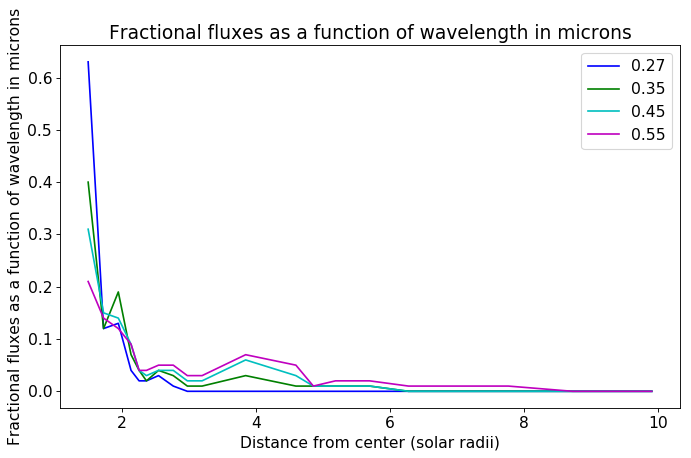

In [49]:
fig=plt.figure(figsize=(10, 6), dpi= 80)
plt.rcParams.update({'font.size': 14})
plt.plot(khh_rad[:20], khh_fluxes[:,0][:20], 'b-', label='0.27')
plt.plot(khh_rad[:20], khh_fluxes[:,1][:20], 'g-', label='0.35')
plt.plot(khh_rad[:20], khh_fluxes[:,2][:20], 'c-', label='0.45')
plt.plot(khh_rad[:20], khh_fluxes[:,3][:20], 'm-', label='0.55')

plt.ylabel('Fractional fluxes as a function of wavelength in microns')
plt.xlabel('Distance from center (solar radii)')
plt.title('Fractional fluxes as a function of wavelength in microns')
plt.legend()
plt.show()